## <font color = 'Green'> Introduction to Predictive Modeling in Python - Classification </font>

### The Problem - Which drug should be administered to the patient based on their demographics & medical condition?


The dataset and problem have been adopted from Kaggle. If you see yourself moving towards data science and predictive modeling, you are very likely to use Kaggle, or participate in a challenge at some point or the other

Link to the dataset and problem: https://www.kaggle.com/prathamtripathi/drug-classification

The dataset contains demographic information about all patients and their corresponding medical conditions (like BP, Cholestrol and Sodium to Potassium indicator). It also includes an indicator to indicate which drug was administered to them. Our task will be to build a model to predict the correct drug that should be administered to the patient. 

Real life benefits of such model would be faster diagnosis and prescriptions for patients without having to wait in hospitals/clinics, thereby allowing doctors to focus on more critical patients.

<b>Step 0: Some Foundational Stuff</b>

<b><font color = red>Pandas Library for Data Modeling and Analysis</b>

Data massaging and remodeling are essential to data analysis. Pandas is an open source library that enables us to do just that, and more! It is a very powerful library, with functionality that's become indispensible to anyone doing Data Science in Python! The primary data strcuture that we will be working with for this is a <i>Data Frame</i>

<b><font color = red>Numpy Library for Numerical Functions</b>

NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

<b><font color = red>Data Frames in Python</b>

Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. The primary pandas data structure.

<b><font color = red>Lists in Python</b>

A list is a data structure in Python that is a <b> mutable, or changeable, ordered sequence of elements </b>. Each element or value that is inside of a list is called an item.

<b><font color = red>Live Discussion on other data structures</b>

<b>Step 1: Import the libraries

In [5]:
import pandas as pd              # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns            # Statistical Graphic library
import matplotlib.pyplot as plt  # Main graphic library
import collections               # Storing of data types in containers
import matplotlib.image as mpimg # method to save charts as images
from pprint import pprint as pp  # Print data in a "prettier format"
# from pprint import pprint as pp # Print data in a "prettier format"

### Add the pydotplus library
Go to Start and search for Anaconda Powershell Prompt (Anaconda3). Once you see the black command prompt screen, type the following:

pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org pydotplus

In [7]:
# copy the following and install it at Anaconda Prompt "conda install -c conda-forge pydotplus"

In [69]:
import pydotplus

In [70]:
FileName = r"C:\Users\mingj\Desktop\Analytics and Computational modelling\drug200.csv" #change the filename to your directory

In [73]:
customerDataRaw = pd.read_csv(FileName)
customerData = customerDataRaw.copy()

<b>Step 2: Study the data

In [72]:
type(customerData)

pandas.core.frame.DataFrame

The head function shows the first 5 rows of the dataframe

In [74]:
customerData.head()

,CustomerID,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,1,23,F,HIGH,HIGH,25.355,DrugY
1,2,47,M,LOW,HIGH,13.093,drugC
2,3,47,M,LOW,HIGH,10.114,drugC
3,4,28,F,NORMAL,HIGH,7.798,drugX
4,5,61,F,LOW,HIGH,18.043,DrugY


In [75]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   200 non-null    int64  
 1   Age          200 non-null    int64  
 2   Sex          200 non-null    object 
 3   BP           200 non-null    object 
 4   Cholesterol  200 non-null    object 
 5   Na_to_K      200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 11.1+ KB


In [76]:
customerData.describe()

,CustomerID,Age,Na_to_K
count,200.000000,200.000000,200.000000
mean,100.500000,44.315000,16.084485
std,57.879185,16.544315,7.223956
min,1.000000,15.000000,6.269000
25%,50.750000,31.000000,10.445500
50%,100.500000,45.000000,13.936500
75%,150.250000,58.000000,19.380000
max,200.000000,74.000000,38.247000


<b>Step 3: Check for sparsity / invalid values </b>
 <br>
 Here we check for any  missing values or invalid values</br>

In [26]:
customerData.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [27]:
print(customerData.isna().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [28]:
print(customerData.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


<b>Step 4: Perform Univariate Analysis


1) Age Variable

In [29]:
customerData['Age'].max()
customerData['Age'].min()  # last code ran

15

In [30]:
print("Maximumn Age:",customerData['Age'].max())
print("Minimumn Age:",customerData['Age'].min())  # for variables with space, use ['Age'] to extract variable, otherwise use .Age

Maximumn Age: 74
Minimumn Age: 15


In [31]:
print("Max Age:", customerData.Age.max())
print("Min Age:", customerData.Age.min())

Max Age: 74
Min Age: 15


C:\Users\mingj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


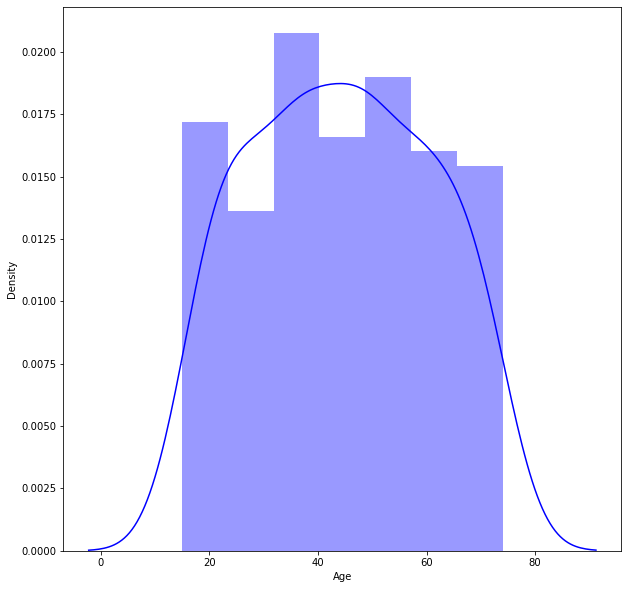

In [32]:
plt.figure(figsize=(10,10))  # (10,10) is the size of the figure
sns.distplot(customerData['Age'], color ='blue')
plt.show()

C:\Users\mingj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


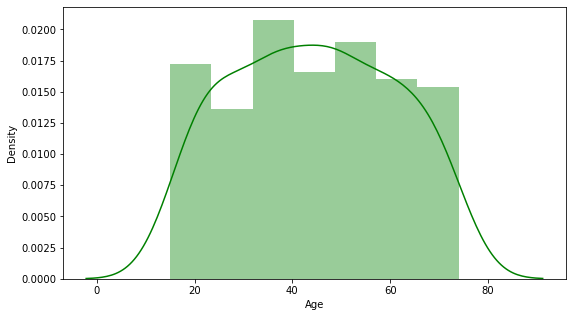

In [33]:
# Age distribution
plt.figure(figsize = (9,5))
sns.distplot(customerData.Age,color='g')
plt.show()

2) Sex Variable

In [34]:
customerData['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [35]:
customerData.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

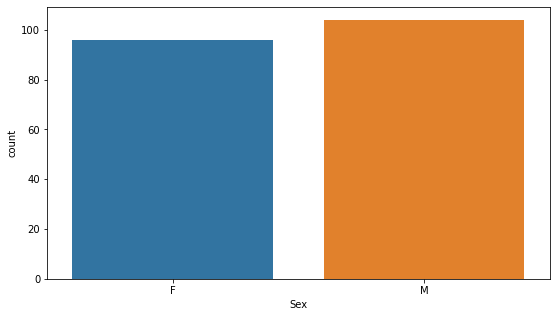

In [36]:
# Sex Distribution
plt.figure(figsize=(9,5))
sns.countplot(x = customerData.Sex)
plt.show()

3) BP Variable

In [37]:
customerData['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [38]:
customerData.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

C:\Users\mingj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


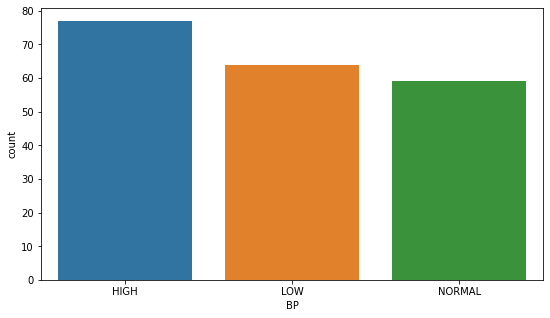

In [39]:
plt.figure(figsize = (9,5))
sns.countplot(customerData.BP)
plt.show()

4) Cholestrol Variable

In [40]:
customerData['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [41]:
customerData.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

C:\Users\mingj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


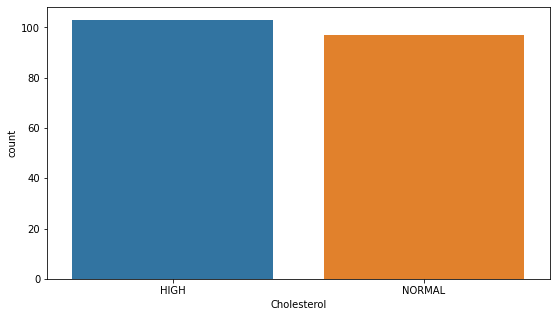

In [42]:
plt.figure(figsize = (9,5))
sns.countplot(customerData.Cholesterol)
plt.show()

5) Na_to_K Variable

In [43]:
print("Max Na_to_K:",customerData.Na_to_K.max())
print("Min Na_to_K:",customerData.Na_to_K.min())
print("Mean Na_to_K:",customerData.Na_to_K.mean())

Max Na_to_K: 38.247
Min Na_to_K: 6.269
Mean Na_to_K: 16.08448499999999


In [44]:
customerData.describe()  # summary statistics

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


C:\Users\mingj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


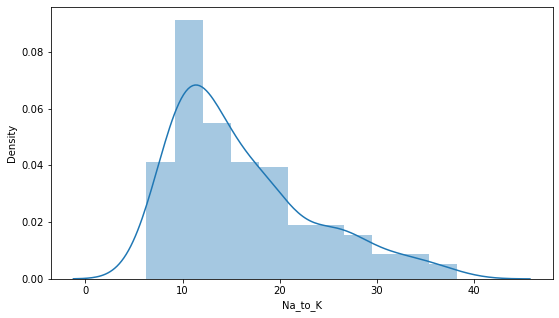

In [45]:
plt.figure(figsize = (9,5))
sns.distplot(customerData.Na_to_K)
plt.show()

6) Drug Variable

In [46]:
customerData['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [47]:
customerData.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

C:\Users\mingj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


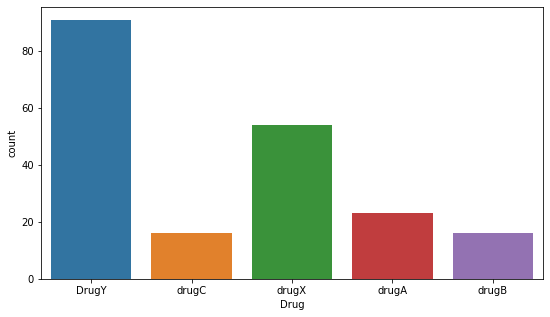

In [48]:
plt.figure(figsize = (9,5))
sns.countplot(customerData.Drug)
plt.show()

**Step 5: Perform Bivariate Analysis**

1) Drug & Age

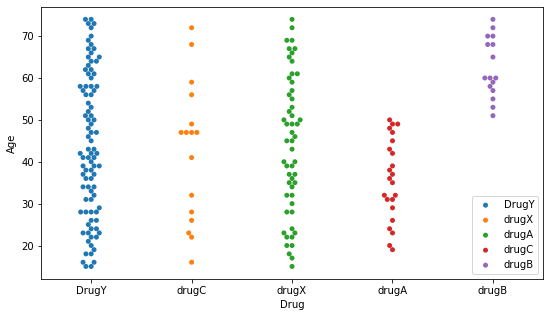

In [49]:
# Draw a categorical scatterplot with non-overlapping points, similar to stripplot(), but the points are adjusted 
# (only along the categorical axis) so that they don’t overlap
plt.figure(figsize = (9,5))
sns.swarmplot(x='Drug', y='Age', data =customerData)
plt.legend(customerData['Drug'].value_counts().index)
plt.show()

In [50]:
customerData.Age[customerData.Drug == "drugB"].min()
customerData.Age[customerData.Drug == "drugA"].max()

50

In [51]:
print("Minimumn Age of DrugB",customerData.Age[customerData.Drug == "drugB"].min())
print("Maximumn Age of DrugA",customerData.Age[customerData.Drug == "drugA"].max())

Minimumn Age of DrugB 51
Maximumn Age of DrugA 50


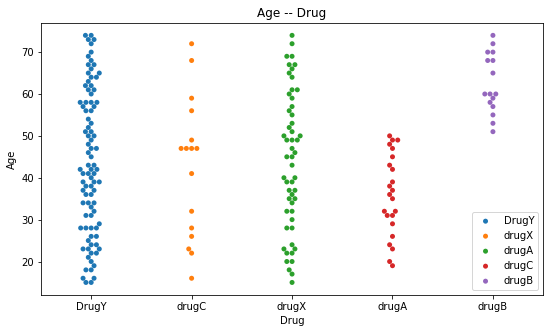

In [52]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = customerData)
plt.legend(customerData.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()

In [53]:
print("Minimum Age of DrugB: ",customerData.Age[customerData.Drug == "drugB"].min())
print("Maximum Age of DrugA: ",customerData.Age[customerData.Drug == "drugA"].max())

Minimum Age of DrugB:  51
Maximum Age of DrugA:  50


2) Drug & Sex

In [54]:
df_Sex_Drug = customerData.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


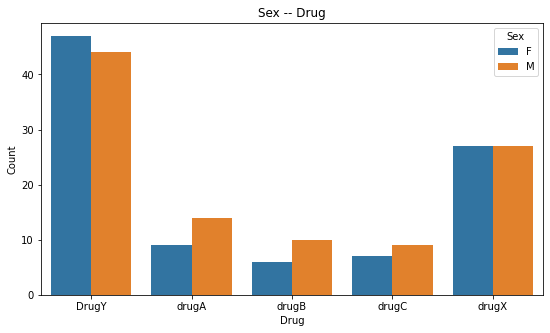

In [55]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Sex -- Drug")
plt.show()

3) Drug & BP

In [56]:
df_BP_Drug = customerData.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BP_Drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


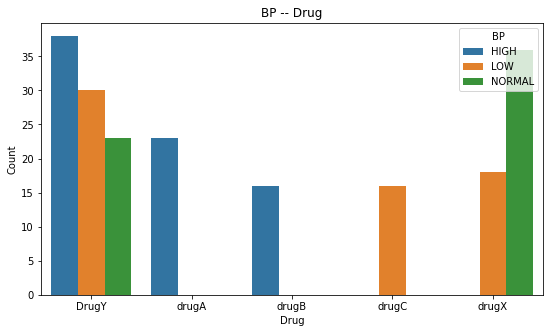

In [57]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("BP -- Drug")
plt.show()

4) Drug & Na to K

In [58]:
df_Na_to_K_Drug = customerData.groupby(["Drug","Na_to_K"]).size()
df_Na_to_K_Drug

Drug   Na_to_K
DrugY  15.015     1
       15.036     1
       15.156     1
       15.171     1
       15.376     1
                 ..
drugX  13.938     1
       14.020     1
       14.133     1
       14.216     1
       14.642     1
Length: 199, dtype: int64

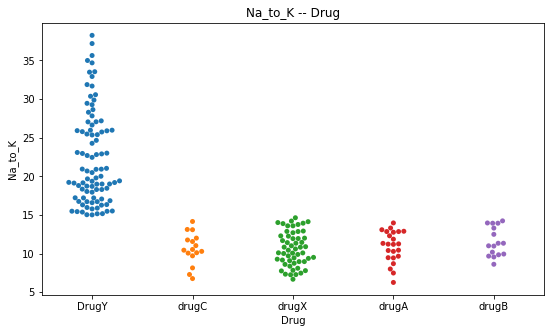

In [59]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = customerData)
plt.title("Na_to_K -- Drug")
plt.show()

In [60]:
print("Minimum Na_to_K for DrugY:",customerData.Na_to_K[customerData.Drug == "DrugY"].min())

Minimum Na_to_K for DrugY: 15.015


5) Drug to Cholestrol

In [61]:
df_CH_Drug = customerData.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


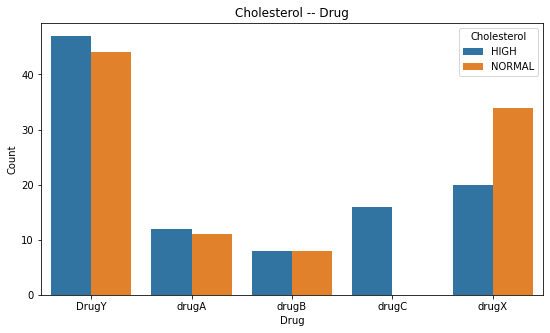

In [62]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()

6) Drug & BP --- Na to K

In [63]:
df_Drug_BP_Na_to_K = customerData.groupby(["Drug","BP","Na_to_K"]).size()
df_Drug_BP_Na_to_K

Drug   BP      Na_to_K
DrugY  HIGH    15.156     1
               15.436     1
               15.490     1
               15.516     1
               16.347     1
                         ..
drugX  NORMAL  13.597     1
               13.884     1
               14.020     1
               14.133     1
               14.216     1
Length: 200, dtype: int64

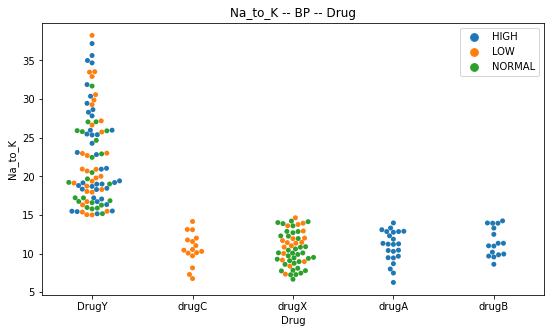

In [64]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = customerData)
plt.legend()
plt.title("Na_to_K -- BP -- Drug")
plt.show()

**Step 6: Preparing Data and Feature Engineering**

Drop Irrelevant Features

In [78]:
customerData.head()

,CustomerID,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,1,23,F,HIGH,HIGH,25.355,DrugY
1,2,47,M,LOW,HIGH,13.093,drugC
2,3,47,M,LOW,HIGH,10.114,drugC
3,4,28,F,NORMAL,HIGH,7.798,drugX
4,5,61,F,LOW,HIGH,18.043,DrugY


In [79]:
customerData.drop(['CustomerID'], axis = 1) # aixs = 0  dropping by row and axis=1 dropping by column

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [80]:
customerData.drop(['CustomerID'], axis = 1, inplace=True)

In [81]:
customerData.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [82]:
customerData.drop(['Drug'], axis = 1, inplace=True)

In [83]:
customerData.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [84]:
customerDataRaw.head()

,CustomerID,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,1,23,F,HIGH,HIGH,25.355,DrugY
1,2,47,M,LOW,HIGH,13.093,drugC
2,3,47,M,LOW,HIGH,10.114,drugC
3,4,28,F,NORMAL,HIGH,7.798,drugX
4,5,61,F,LOW,HIGH,18.043,DrugY


In [85]:
customerData = customerDataRaw.copy() # resume back all the data

In [86]:
customerData.head()

,CustomerID,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,1,23,F,HIGH,HIGH,25.355,DrugY
1,2,47,M,LOW,HIGH,13.093,drugC
2,3,47,M,LOW,HIGH,10.114,drugC
3,4,28,F,NORMAL,HIGH,7.798,drugX
4,5,61,F,LOW,HIGH,18.043,DrugY


In [87]:
customerData.drop(['CustomerID'], axis = 1, inplace=True)

In [88]:
customerData.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Create New Features

In [91]:
customerData['Na_to_K_Bigger_Than_15'] = [1 if i >= 15.015 else 0 for i in customerData['Na_to_K']]

In [92]:
customerData['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in customerData.Na_to_K]
customerData.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1


In [98]:
df_NaK15 = customerData.groupby(["Drug","Na_to_K","Na_to_K_Bigger_Than_15"]).size().reset_index(name = "Count")
df_NaK15

,Drug,Na_to_K,Na_to_K_Bigger_Than_15,Count
0,DrugY,15.015,1,1
1,DrugY,15.036,1,1
2,DrugY,15.156,1,1
3,DrugY,15.171,1,1
4,DrugY,15.376,1,1
...,...,...,...,...
194,drugX,13.938,0,1
195,drugX,14.020,0,1
196,drugX,14.133,0,1
197,drugX,14.216,0,1


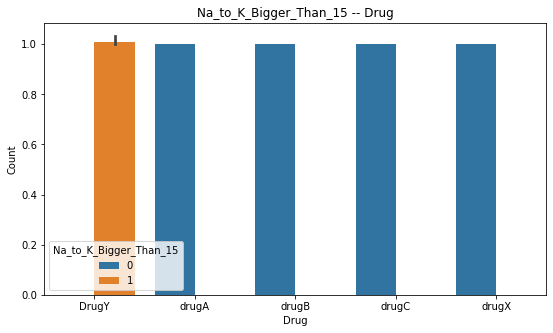

In [99]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Na_to_K_Bigger_Than_15",data = df_NaK15)
plt.title("Na_to_K_Bigger_Than_15 -- Drug")
plt.show()

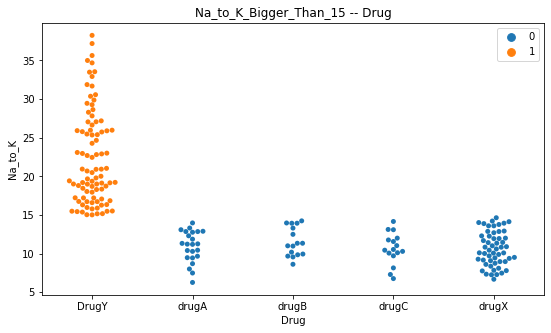

In [100]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug",y="Na_to_K",hue = "Na_to_K_Bigger_Than_15",data = df_NaK15)
plt.title("Na_to_K_Bigger_Than_15 -- Drug")
plt.legend()
plt.show()

Label Encoding

# [] & () & {}
() is a tuple: An immutable collection of values, usually (but not necessarily) of different types.
[] is a list: A mutable collection of values, usually (but not necessarily) of the same type.
{} is a dict: Use a dictionary for key value pairs.

In [101]:
types_lookup = {}
types_lookup['BP'] = list(customerData['BP'].unique())
types_lookup['Cholesterol'] = list(customerData['Cholesterol'].unique())
types_lookup['Drug'] = list(customerData['Drug'].unique())
types_lookup['Sex'] = list(customerData['Sex'].unique()) 

In [104]:
pp(types_lookup)

{'BP': ['HIGH', 'LOW', 'NORMAL'],
 'Cholesterol': ['HIGH', 'NORMAL'],
 'Drug': ['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'],
 'Sex': ['F', 'M']}


In [105]:
print(types_lookup)

{'BP': ['HIGH', 'LOW', 'NORMAL'], 'Cholesterol': ['HIGH', 'NORMAL'], 'Drug': ['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], 'Sex': ['F', 'M']}


In [107]:
types_lookup

{'BP': ['HIGH', 'LOW', 'NORMAL'],
 'Cholesterol': ['HIGH', 'NORMAL'],
 'Drug': ['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'],
 'Sex': ['F', 'M']}

In [109]:
from sklearn.preprocessing import LabelEncoder # using Alphabet assending to identify 0, 1, 2...e.g. F=0, M=1

def label_encoder(y):
    le = LabelEncoder()
    customerData[y] = le.fit_transform(customerData[y])

In [110]:
label_list = ["Sex","BP","Cholesterol","Na_to_K","Na_to_K_Bigger_Than_15","Drug"]

for l in label_list:
    label_encoder(l)

In [111]:
customerData.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,0,0,0,167,0,1
1,47,1,1,0,89,3,0
2,47,1,1,0,43,3,0
3,28,0,2,0,10,4,0
4,61,0,1,0,133,0,1


In [112]:
customerDataRaw.head()

,CustomerID,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,1,23,F,HIGH,HIGH,25.355,DrugY
1,2,47,M,LOW,HIGH,13.093,drugC
2,3,47,M,LOW,HIGH,10.114,drugC
3,4,28,F,NORMAL,HIGH,7.798,drugX
4,5,61,F,LOW,HIGH,18.043,DrugY


**Step 7: Split into Training and Testing Dataset**

In [125]:
from sklearn.model_selection import train_test_split

x=customerData.drop(['Drug'],axis=1)
y=customerData['Drug']

In [126]:
x

,Age,Sex,BP,Cholesterol,Na_to_K,Na_to_K_Bigger_Than_15
0,23,0,0,0,167,1
1,47,1,1,0,89,0
2,47,1,1,0,43,0
3,28,0,2,0,10,0
4,61,0,1,0,133,1
...,...,...,...,...,...,...
195,56,0,1,0,69,0
196,16,1,1,0,75,0
197,52,1,2,0,36,0
198,23,1,2,1,102,0


In [127]:
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int32

In [128]:
print(x)
print(y)

     Age  Sex  BP  Cholesterol  Na_to_K  Na_to_K_Bigger_Than_15
0     23    0   0            0      167                       1
1     47    1   1            0       89                       0
2     47    1   1            0       43                       0
3     28    0   2            0       10                       0
4     61    0   1            0      133                       1
..   ...  ...  ..          ...      ...                     ...
195   56    0   1            0       69                       0
196   16    1   1            0       75                       0
197   52    1   2            0       36                       0
198   23    1   2            1      102                       0
199   40    0   1            1       66                       0

[200 rows x 6 columns]
0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int32


In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= .2, random_state = 42, shuffle = False)    
# normally train = 70-80% and test 20-30%, if defined test_size then train_size=1-test_size

x_train

,Age,Sex,BP,Cholesterol,Na_to_K,Na_to_K_Bigger_Than_15
0,23,0,0,0,167,1
1,47,1,1,0,89,0
2,47,1,1,0,43,0
3,28,0,2,0,10,0
4,61,0,1,0,133,1
...,...,...,...,...,...,...
155,49,1,1,0,51,0
156,31,1,0,1,61,0
157,53,1,1,0,162,1
158,59,0,1,0,49,0


In [129]:
x_test

,Age,Sex,BP,Cholesterol,Na_to_K,Na_to_K_Bigger_Than_15
95,36,1,1,1,67,0
15,16,0,0,1,116,1
30,18,0,2,1,19,0
158,59,0,1,0,49,0
128,47,1,1,1,192,1
115,51,1,0,0,134,1
69,18,0,0,1,165,1
170,28,0,2,0,85,0
174,42,1,0,1,81,0
45,66,0,2,1,13,0


In [130]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= .2, random_state = 42, shuffle = True)    
# normally train = 70-80% and test 20-30%, if defined test_size then train_size=1-test_size

x_train

,Age,Sex,BP,Cholesterol,Na_to_K,Na_to_K_Bigger_Than_15
79,32,0,1,1,54,0
197,52,1,2,0,36,0
38,39,0,2,1,33,0
24,33,0,1,0,191,1
122,34,1,2,0,158,1
...,...,...,...,...,...,...
106,22,1,2,0,74,0
14,50,0,2,0,80,0
92,29,0,0,0,184,1
179,67,0,2,0,118,1


In [131]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (160, 6)
x_test shape: (40, 6)
y_train shape: (160, 1)
y_test shape: (40, 1)


In [122]:
from sklearn.model_selection import train_test_split

x = customerData.drop(["Drug"],axis=1)
y = customerData.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (160, 6)
x_test shape: (40, 6)
y_train shape: (160, 1)
y_test shape: (40, 1)


**Step 8: Define and train model**

# search in google on "decisionTreeClassifier"

In [144]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion = "entropy",max_depth = 4)
drugTree


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [146]:
drugTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

**Step 9: Run model to generate test output**

In [147]:
predTree = drugTree.predict(x_test)
print(predTree[0:5])
print(y_test[0:5])

[4 0 4 3 0]
[[4]
 [0]
 [4]
 [3]
 [0]]


**Step 10: Measure performance & Result Visualization**

In [148]:
from sklearn import metrics
print("The Accuracy Score is:", metrics.accuracy_score(y_test,predTree))

The Accuracy Score is: 1.0


In [149]:
data_feature_names = ['Age', 'Sex', 'BP', 'Cholesterol','Na_to_K','Na_to_K_Bigger_Than_15']

# search in Google on "tree sklearn"

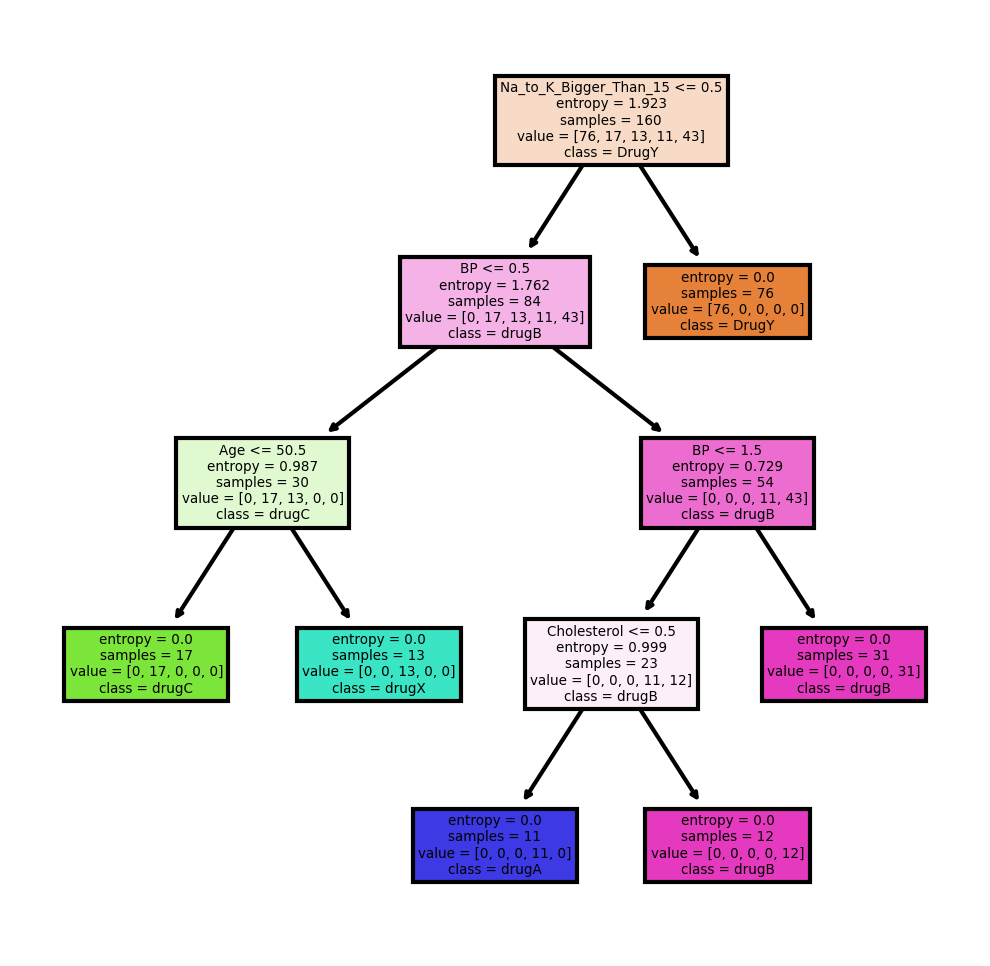

In [150]:
from sklearn import tree
feature_names = list(x_train.columns)
class_names = list(types_lookup['Drug'])

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(drugTree,
               feature_names = feature_names, 
               class_names=class_names,
               filled = True);